<a href="https://colab.research.google.com/github/surajsingh1204/Supervised-learing-/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv("Housing.csv")

In [19]:
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [20]:
df.furnishingstatus

,furnishingstatus
0,furnished
1,furnished
2,semi-furnished
3,furnished
4,furnished
...,...
540,unfurnished
541,semi-furnished
542,unfurnished
543,furnished


In [21]:
df["furnishingstatus"] = df.groupby("furnishingstatus")["price"].transform("mean")
df["mainroad"] = df.groupby("mainroad")["price"].transform("mean")
df["guestroom"] = df.groupby("guestroom")["price"].transform("mean")
df["basement"] = df.groupby("basement")["price"].transform("mean")
df["hotwaterheating"] = df.groupby("hotwaterheating")["price"].transform("mean")
df["airconditioning"] = df.groupby("airconditioning")["price"].transform("mean")
df["parking"] = df.groupby("parking")["price"].transform("mean")
df["prefarea"] = df.groupby("prefarea")["price"].transform("mean")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,4.991777e+06,4.544546e+06,4.509966e+06,4.728593e+06,6.013221e+06,5.896328e+06,5.879046e+06,5.495696e+06
1,12250000,8960,4,4,4,4.991777e+06,4.544546e+06,4.509966e+06,4.728593e+06,6.013221e+06,5.867167e+06,4.425299e+06,5.495696e+06
2,12250000,9960,3,2,2,4.991777e+06,4.544546e+06,5.242615e+06,4.728593e+06,4.191940e+06,5.896328e+06,5.879046e+06,4.907524e+06
3,12215000,7500,4,2,2,4.991777e+06,4.544546e+06,5.242615e+06,4.728593e+06,6.013221e+06,5.867167e+06,5.879046e+06,5.495696e+06
4,11410000,7420,4,1,2,4.991777e+06,5.792897e+06,5.242615e+06,4.728593e+06,6.013221e+06,5.896328e+06,4.425299e+06,5.495696e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,4.991777e+06,4.544546e+06,5.242615e+06,4.728593e+06,4.191940e+06,5.896328e+06,4.425299e+06,4.013831e+06
541,1767150,2400,3,1,1,3.398905e+06,4.544546e+06,4.509966e+06,4.728593e+06,4.191940e+06,4.136017e+06,4.425299e+06,4.907524e+06
542,1750000,3620,2,1,1,4.991777e+06,4.544546e+06,4.509966e+06,4.728593e+06,4.191940e+06,4.136017e+06,4.425299e+06,4.013831e+06
543,1750000,2910,3,1,1,3.398905e+06,4.544546e+06,4.509966e+06,4.728593e+06,4.191940e+06,4.136017e+06,4.425299e+06,5.495696e+06


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df1

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,1.000000,1.0,1.000000
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.983434,0.0,1.000000
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,1.000000,1.0,0.603087
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,0.983434,1.0,1.000000
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,1.000000,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,1.000000,0.0,0.000000
541,0.001485,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.603087
542,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
543,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
y = df1["price"]
x = df1.drop("price", axis=1)
y.shape,x.shape

((545,), (545, 12))

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, y_train.shape, x_test.shape, y_test.shape # test data to predict the output

((381, 12), (381,), (164, 12), (164,))

In [26]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
180,0.195876,0.6,0.333333,0.000000,0.0,0.0,1.0,0.0,1.0,1.000000,0.0,0.603087
189,0.129897,0.2,0.000000,0.000000,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.603087
93,0.381443,0.4,0.333333,0.000000,1.0,0.0,1.0,0.0,1.0,0.983434,0.0,0.603087
444,0.101031,0.4,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.000000
81,0.161512,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,0.598969,0.0,0.603087
...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.674227,0.4,0.000000,0.666667,1.0,0.0,0.0,0.0,0.0,1.000000,1.0,0.603087
144,0.209622,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.598969,0.0,1.000000
72,0.231615,0.4,0.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.000000
235,0.276976,0.4,0.000000,0.333333,1.0,1.0,0.0,0.0,1.0,0.598969,0.0,0.603087


In [27]:
x_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
62,0.315464,0.6,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,0.598969,0.0,1.000000
247,0.463918,0.6,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.983434,0.0,0.000000
142,0.608247,0.6,0.333333,0.333333,1.0,0.0,0.0,0.0,0.0,0.598969,0.0,0.603087
107,0.327835,0.4,0.000000,0.666667,1.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.000000
483,0.341237,0.4,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.603087
...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.123711,0.4,0.000000,0.333333,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.603087
542,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
408,0.161512,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
80,0.298969,0.4,0.000000,0.333333,1.0,0.0,0.0,1.0,0.0,0.598969,1.0,0.603087


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()#linear regression  is the class and model is the object of the class
model.fit(x_train, y_train)# call method fit and it will train the model using the trained data

LinearRegression()

In [31]:
model.coef_

array([0.30955709, 0.01937568, 0.26649477, 0.13574504, 0.04143388,
       0.02313738, 0.04799399, 0.06887374, 0.05251684, 0.05075076,
       0.04320654, 0.03582772])

In [32]:
model.intercept_

-0.006237680076584151

In [34]:
# to predict the price of car y
y_test_predict = model.predict(x_test)#command to predict the test data
y_test_predict

array([0.39729834, 0.37608563, 0.42119421, 0.32612736, 0.21543441,
       0.10216559, 0.08500086, 0.46546587, 0.05580435, 0.23359148,
       0.18786235, 0.15855559, 0.25297752, 0.24716647, 0.311245  ,
       0.53121082, 0.21990047, 0.15322656, 0.42215991, 0.08160087,
       0.24285625, 0.31094207, 0.28968679, 0.14891352, 0.32885816,
       0.44940929, 0.09819127, 0.49758426, 0.50401114, 0.22300875,
       0.49928135, 0.43746655, 0.27460956, 0.25594364, 0.37972402,
       0.2462208 , 0.40212702, 0.14398508, 0.28309491, 0.35430892,
       0.18791322, 0.13770029, 0.16937844, 0.23640285, 0.3962385 ,
       0.14450891, 0.27191738, 0.0867557 , 0.06823839, 0.1350007 ,
       0.28193576, 0.23910593, 0.07843083, 0.12178453, 0.2650146 ,
       0.22928139, 0.1346487 , 0.20977075, 0.16019556, 0.27224318,
       0.41258794, 0.41738974, 0.08140939, 0.21225203, 0.21999594,
       0.02444446, 0.23289521, 0.12079175, 0.2409194 , 0.22373858,
       0.34476728, 0.29842534, 0.30903179, 0.08055837, 0.25423

In [35]:
model.score(x_train, y_train)# to find the accuracy of the model

0.6819603639732331

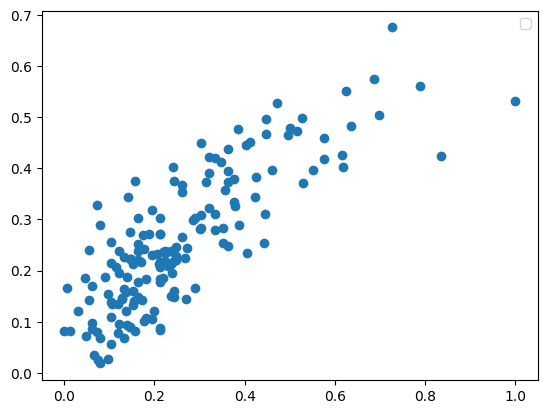

In [36]:
fig = plt.figure()
plt.scatter(y_test, y_test_predict)# graph between predicted and the test output
plt.legend()
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'area'),
  Text(1, 0, 'bedrooms'),
  Text(2, 0, 'bathrooms'),
  Text(3, 0, 'stories'),
  Text(4, 0, 'mainroad'),
  Text(5, 0, 'guestroom'),
  Text(6, 0, 'basement'),
  Text(7, 0, 'hotwaterheating'),
  Text(8, 0, 'airconditioning'),
  Text(9, 0, 'parking'),
  Text(10, 0, 'prefarea'),
  Text(11, 0, 'furnishingstatus')])

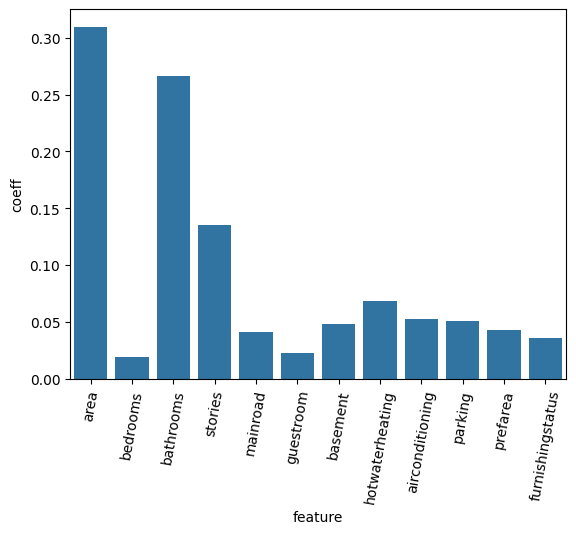

In [39]:
import seaborn as sns
imp = pd.DataFrame(list(zip(x_test.columns,np.abs(model.coef_))), columns=['feature', 'coeff'])
sns.barplot(x = 'feature', y = 'coeff' , data = imp)
plt.xticks(rotation = 80)
